Кластеризация слов по предобученным эмбеддингам методами K-Means и aglomerate clustering

# Задание

В данном задании необходимо сгруппировать по смыслу слова из заданного списка с помощью алгоритмов кластеризации. Чтобы это осуществить, мы воспользуемся предобученными векторными представлениями (эмбеддингами) этих слов.

1. Загрузите предобученные эмбеддинги слов из библиотеки `gensim` (модель `word2vec-ruscorpora-300`). Преобразуйте слова из представленного списка к векторному представлению.
2. Подберите подходящее число кластеров для кластеризации с помощью алгоритма KMeans - для этого понадобится построить график зависимости среднего расстояния между точками и центрами кластеров, к которым они принадлежат, от числа кластеров.
3. Сгруппируйте слова по кластерам с помощью алгоритма KMeans, взяв число кластеров, найденное в прошлом пункте задания. Выведите содержимое каждого полученного кластера.
4. Визуализируйте результат иерархической кластеризации слов с использованием дендрограммы из библиотеки `SciPy` (методы `dendrogram` и `ward` из модуля `scipy.cluster.hierarchy`). Для более наглядной визуализации при вызове функции `dendrogram` задайте параметры `orientation` (ориентация графика) и `labels` (список названий кластеризуемых объектов - в данном случае список кластеризуемых слов). Должен получиться примерно следующий результат:
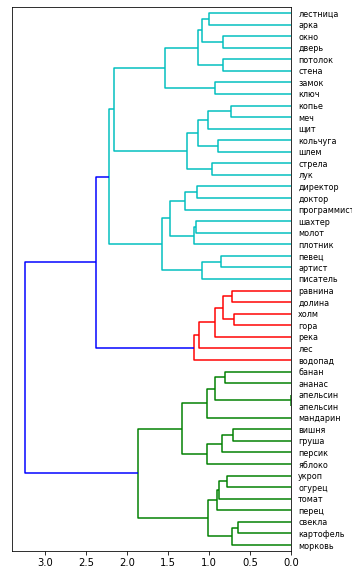
5. Напишите выводы по полученным результатам.

**Импорты**

In [ ]:
import gensim.downloader
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt
import numpy as np

**Примеры кода**

Получение векторных представлений слов

In [ ]:
words_list = ['компьютер', 'диск', 'клавиатура', 'молоток', 'станок', 'дрель']  # Создаем список слов, которые необходимо кластеризовать
words_with_pos_list = [word + '_NOUN' for word in words_list]                   # Добавляем тэг части речи (существительное) к каждому слову из списка (необходимо для извлечения эмбеддингов)

In [ ]:
vectors_dict = gensim.downloader.load('word2vec-ruscorpora-300')                # Загружаем модель для извлечения векторных представлений слов

[==================================================] 100.0% 198.8/198.8MB downloaded


In [ ]:
vectors = vectors_dict[words_with_pos_list]                                      # Получаем векторные представления слов
print(vectors.shape)                                                             # Проверяем размерность полученного массива

(6, 300)


Построение графика зависимости среднего расстояния до центров кластеров от числа кластеров

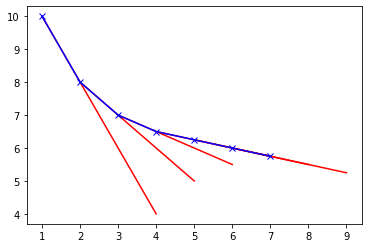

In [ ]:
n_clusters_list = [1, 2, 3, 4, 5, 6, 7]                                   # Список со значениями числа кластеров
inertia_list = [10, 8, 7, 6.5, 6.25, 6, 5.75]                             # Список с соответствующими средними значениями до центров кластеров (inertia)

for idx, n_clusters in enumerate(n_clusters_list[:-1]):                   # Итерируемся по списку со значениями числа кластеров + получаем индекс текущего элемента
  change = inertia_list[idx + 1] - inertia_list[idx]                      # Рассчитываем изменение значения inertia при увеличении числа кластеров на 1
  plt.plot(                                                               # Строим линии, показывающие направление изменения значения inertia при увеличении числа кластеров на 1
      [n_clusters, n_clusters + 3], 
      [inertia_list[idx], inertia_list[idx] + 3 * change], color='red')
plt.plot(n_clusters_list, inertia_list, 'bx-')                            # Строим график зависимости среднего расстояния до центров кластеров от числа кластеров

**Решение**

In [ ]:
# Создаем список слов, которые необходимо кластеризовать
words_list = ['яблоко', 'груша', 'апельсин', 'ананас', 'вишня', 'персик', 'банан', 'апельсин', 'мандарин',
              'томат', 'огурец', 'картофель', 'свекла', 'укроп', 'перец', 'морковь', 'лук',
              'стрела', 'меч', 'щит', 'копье', 'шлем', 'кольчуга', 'молот',
              'доктор', 'программист', 'плотник', 'артист', 'певец', 'директор', 'писатель', 'шахтер',
              'лес', 'долина', 'гора', 'река', 'равнина', 'холм', 'водопад', 'ключ', 
              'замок', 'дверь', 'арка', 'стена', 'лестница', 'потолок', 'окно']

words_with_pos_list = [word + '_NOUN' for word in words_list]     # Добавляем тэг части речи (существительное) к каждому слову из списка (необходимо для извлечения эмбеддингов)

In [ ]:
vectors = vectors_dict[words_with_pos_list]

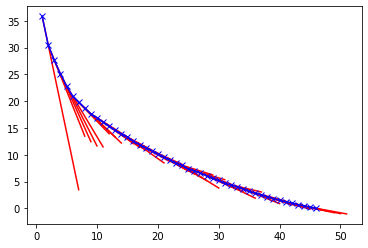

In [ ]:
n_clusters_list = []                                   # Список со значениями числа кластеров
inertia_list = []
KMean_models = []
predict_KMeans= []
selected_clusters=[]

for n_clusters in range(1,len(words_list)):
  n_clusters_list.append(n_clusters)
  KMean_models.append(KMeans(n_clusters=n_clusters))
  selected_clusters.append(KMean_models[-1].fit_predict(vectors))
  inertia_list.append(KMean_models[-1].inertia_)
  if(n_clusters>=2):
    change = inertia_list[-2] - inertia_list[-1]
    plt.plot(                                                               # Строим линии, показывающие направление изменения значения inertia при увеличении числа кластеров на 1
      [n_clusters-1, n_clusters+5], 
      [inertia_list[-2], inertia_list[-2] - change*6], color='red')
plt.plot(n_clusters_list, inertia_list, 'bx-')                            # Строим график зависимости среднего расстояния до центров кластеров от числа кластеров

Нет очевидного оптимального числа, т.к. слов мало. Можно взять 6 или 11 кластеров.

In [ ]:
selected_clusters[5]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int32)

Результаты, слова в кластерах K-means

In [ ]:
for i in range(6):
  print("Cluster-",i)
  print([words_list[i] for i in np.where(selected_clusters[5]==i)[0]])

Cluster- 0
['стрела', 'меч', 'щит', 'копье', 'шлем', 'кольчуга', 'молот']
Cluster- 1
['яблоко', 'груша', 'апельсин', 'ананас', 'вишня', 'персик', 'банан', 'апельсин', 'мандарин']
Cluster- 2
['ключ', 'замок', 'дверь', 'арка', 'стена', 'лестница', 'потолок', 'окно']
Cluster- 3
['лес', 'долина', 'гора', 'река', 'равнина', 'холм', 'водопад']
Cluster- 4
['томат', 'огурец', 'картофель', 'свекла', 'укроп', 'перец', 'морковь', 'лук']
Cluster- 5
['доктор', 'программист', 'плотник', 'артист', 'певец', 'директор', 'писатель', 'шахтер']


Дендрограмма для aglomerate clustering

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

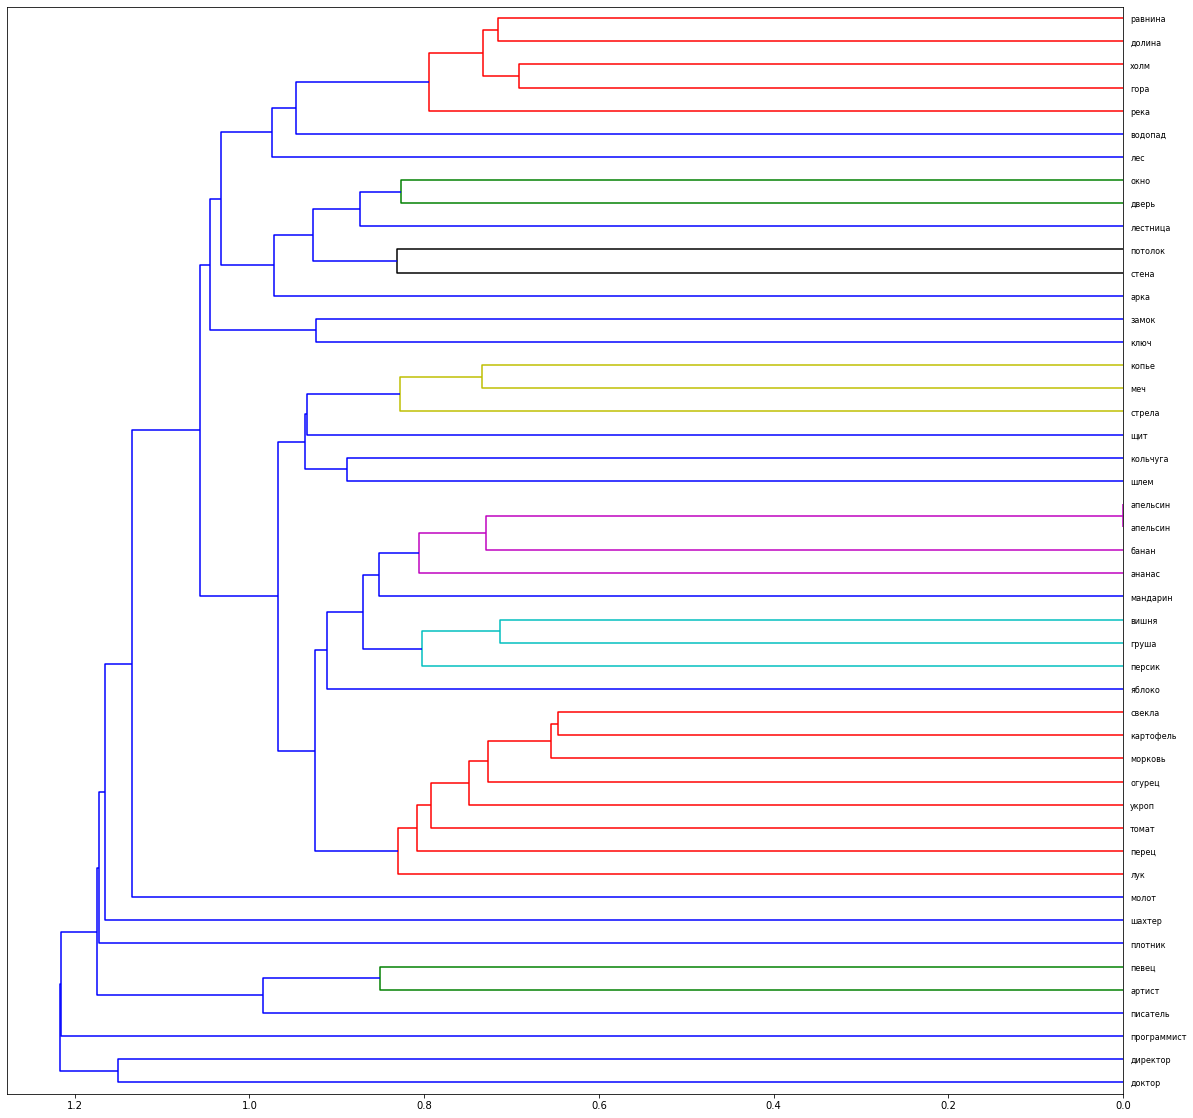

In [ ]:
Z = hierarchy.linkage(vectors, 'single')
plt.figure(figsize=(20, 20))
dn = hierarchy.dendrogram(Z,orientation='left',labels=words_list)

In [ ]:
Z

array([[ 2.        ,  7.        ,  0.        ,  2.        ],
       [11.        , 12.        ,  0.64628128,  2.        ],
       [15.        , 48.        ,  0.65485521,  3.        ],
       [34.        , 37.        ,  0.69138723,  2.        ],
       [ 1.        ,  4.        ,  0.71305644,  2.        ],
       [33.        , 36.        ,  0.71565184,  2.        ],
       [10.        , 49.        ,  0.72722275,  4.        ],
       [ 6.        , 47.        ,  0.72901753,  3.        ],
       [50.        , 52.        ,  0.73271425,  4.        ],
       [18.        , 20.        ,  0.73408294,  2.        ],
       [13.        , 53.        ,  0.74846171,  5.        ],
       [ 9.        , 57.        ,  0.79234583,  6.        ],
       [35.        , 55.        ,  0.79498202,  5.        ],
       [ 5.        , 51.        ,  0.80294806,  3.        ],
       [ 3.        , 54.        ,  0.80620816,  4.        ],
       [14.        , 58.        ,  0.80814763,  7.        ],
       [41.        , 46.

Дальше тесты.

In [ ]:
np.linalg.norm(vectors[0]-vectors[-1])

1.2954335

In [ ]:
np.linalg.norm(KMean_models[1].cluster_centers_[0]-KMean_models[1].cluster_centers_[1])

0.72610134

In [ ]:
print(np.linalg.norm(KMean_models[2].cluster_centers_[0]-KMean_models[2].cluster_centers_[1]))
print(np.linalg.norm(KMean_models[2].cluster_centers_[0]-KMean_models[2].cluster_centers_[2]))
print(np.linalg.norm(KMean_models[2].cluster_centers_[1]-KMean_models[2].cluster_centers_[2]))

0.7171067
0.72610134
0.9191735


In [ ]:
print(np.linalg.norm(KMean_models[3].cluster_centers_[0]-KMean_models[3].cluster_centers_[1]))
print(np.linalg.norm(KMean_models[3].cluster_centers_[0]-KMean_models[3].cluster_centers_[2]))
print(np.linalg.norm(KMean_models[3].cluster_centers_[1]-KMean_models[3].cluster_centers_[2]))
print(np.linalg.norm(KMean_models[3].cluster_centers_[0]-KMean_models[3].cluster_centers_[3]))
print(np.linalg.norm(KMean_models[3].cluster_centers_[1]-KMean_models[3].cluster_centers_[3]))
print(np.linalg.norm(KMean_models[3].cluster_centers_[2]-KMean_models[3].cluster_centers_[3]))

0.9191735
0.72610134
0.7171067


IndexError: ignored